In [9]:
import numpy as np
import script
import pylab as plt
import nibabel as nib
import os
from skimage import filters
import scipy.ndimage as ndi
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_fill_holes as bfh
from scipy.ndimage.morphology import binary_dilation as bd
from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import grey_dilation as gd
import BET
import morphsnakes.morphsnakes as morphsnakes
import time
from skimage.segmentation import find_boundaries as boundaries

In [10]:
planes = np.load('planes.npy')

samps = ['Sample-1', 'Sample-2', 'Sample-3', 'Sample-4', 'Sample-5', 'Sample-A',
 'Sample-B', 'Sample-C', 'Sample-D', 'Sample-F', 'Sample-G', 'Sample-H',
 'Sample-I']

reshaped_niftis = []
for i in range(len(samps)):
    reshaped_niftis.append(os.path.join('/Users/Sinead/DC-project/Post-unskewed-reshaped/', 
                                        '{}.nii.gz'.format(samps[i])))

In [11]:
i = 5
path = reshaped_niftis[i]
samp = samps[i]

In [12]:
img = nib.load(path)
array = img.get_data()
thresholded = np.multiply(array, np.multiply(array>0, array<100).astype(int))

In [13]:
# spaced = BET.spacer(thresholded)
# spaced2 = BET.spacer(spaced)

In [14]:
data = BET.extract(thresholded, samp)

In [15]:
def spacer(data):
    grad = abs(np.gradient(data)[0])
    mask1 = grad<8
    mask2 = grad>0
    mask3 = np.multiply(mask1,mask2) 
    mask4 = (mask3.astype(int)+bounds.astype(int))>0
    result = np.multiply(data, mask4)
    return result

<IPython.core.display.Javascript object>


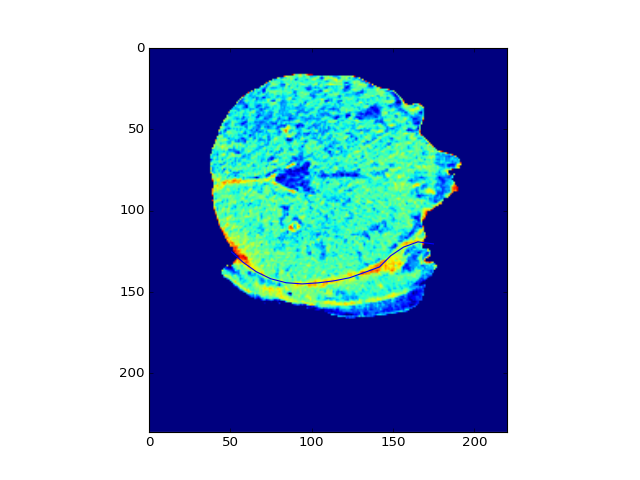

In [199]:
%matplotlib nbagg

slice_no = 80
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
ax.set_xlim([0, data.shape[1]])
ax.set_ylim([data.shape[0], 0])
plt.ion()

coords = []
spline = []
length1 = 1
length0 = 0

def onclick(event):
    global ix, iy, iz
    ix, iy, iz = event.xdata, event.ydata, slice_no
    global coords
    coords.append((ix, iy, iz))
    
    from math import ceil, floor
    np_coords = np.array(coords)
    x = np_coords[:,0]
    y = np_coords[:,1]
    tck, u = interpolate.splprep([x, y], s=0)
    global spline 
    spline = interpolate.splev(np.linspace(u[0], u[-1], len(u)), tck)
    if len(coords)>2:
        interact(pltspline, ax=fixed(ax), spl=fixed(spline))
        
    return None

cid = fig.canvas.mpl_connect('button_press_event', onclick)


In [200]:
fig.canvas.mpl_disconnect(cid)

In [119]:
np_coords = np.array(coords)
x = np_coords[:,0]
y = np_coords[:,1]

<IPython.core.display.Javascript object>


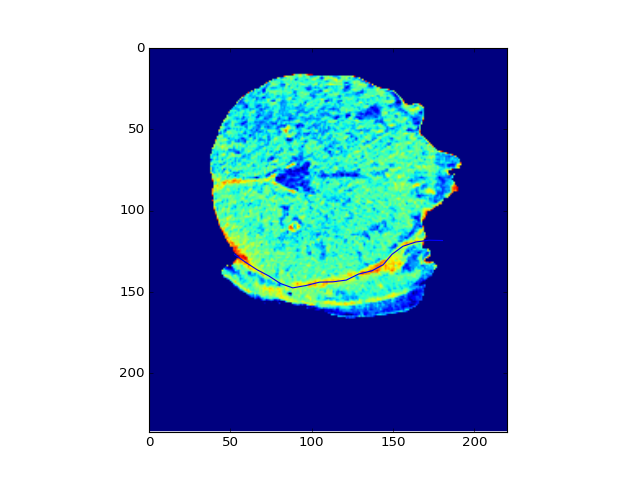

(236, 0)

In [191]:
from math import ceil, floor
tck, u = interpolate.splprep([x, y], s=0)
spline = interpolate.splev(np.linspace(u[0], u[-1], len(u)), tck)
slice_no = 80
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
ax.plot(spline[0], spline[1])
ax.set_xlim([0, data.shape[1]])
ax.set_ylim([data.shape[0], 0])

In [192]:
spline

[array([  52.52685547,   59.3417408 ,   66.32434469,   73.63945896,
          80.80914053,   88.33580858,   96.61940251,  104.82990913,
         113.1264118 ,  121.22950853,  128.76936954,  136.9500925 ,
         143.90358494,  149.34758818,  156.02611146,  163.91179637,
         172.00332519,  180.3601888 ]),
 array([ 126.93066406,  131.70155151,  136.22668265,  140.10886984,
         144.76764284,  147.42656022,  145.94587229,  143.90322174,
         143.69134889,  142.63720853,  138.94281395,  136.93722732,
         133.20860437,  126.79834041,  121.84674223,  119.24596605,
         118.12294955,  118.3264974 ])]

<IPython.core.display.Javascript object>


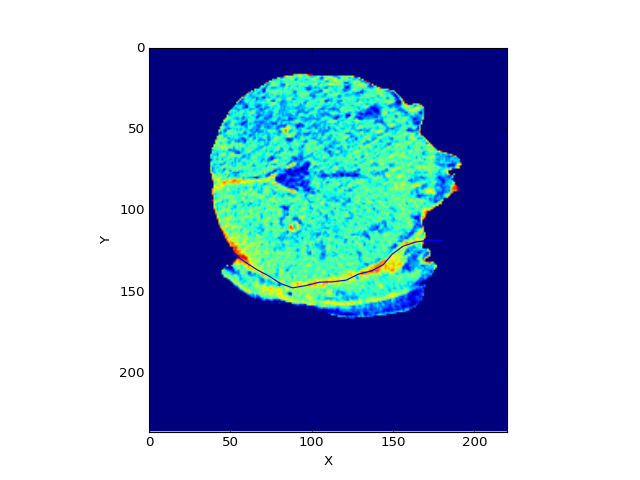

In [193]:
def pltspline(ax, spl):
    ax.imshow(data[:,:,80])
    x = spl[0]
    y = spl[1]
    if len(ax.lines):
        ax.lines[0].set_xdata(x)
        ax.lines[0].set_ydata(y)
    else:
        ax.plot(x,y)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([0, data.shape[1]])
ax.set_ylim([data.shape[0], 0])
pltspline(ax, spline)

In [194]:
interact(pltspline, ax=fixed(ax), spl=fixed(spline))

<function __main__.pltspline>

In [176]:
spline[0].tolist()

[52.52685546874998,
 59.34174080481236,
 66.32434468649411,
 73.63945896309286,
 80.80914052611622,
 88.3358085801004,
 96.61940250744597,
 104.82990912703956,
 113.12641179760843,
 121.22950852704456,
 128.76936954471066,
 136.9500924983499,
 143.90358494052174,
 149.34758817816018,
 156.02611146241253,
 163.91179636935453,
 172.00332519322302,
 180.36018880208326]

In [20]:
#!/usr/bin/env python
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.gcf()
ax = plt.gca()

spl = plt.plot(spline[0], spline[1])

def updatefig(spline):
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    spl.set_offsets(spline[0], spline[1])
    return spl,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

In [88]:
spline

[array([ 54.79248047,  60.9383138 ,  73.8445638 ,  93.51123047]),
 array([ 128.38964844,  133.3063151 ,  140.6813151 ,  144.3688151 ])]

In [36]:
from IPython.html.widgets import interact, fixed, FloatTextWidget, fixed
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name interact

<IPython.core.display.Javascript object>


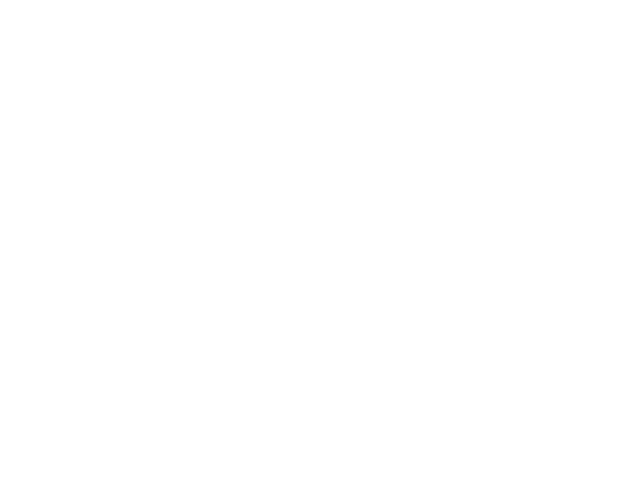

<ipython-input-30-6bd126c18e02>:19: SyntaxWarning:

name 'coords' is used prior to global declaration



NameError: name 'x' is not defined

In [30]:
from scipy import interpolate

%matplotlib nbagg
slice_no = 80
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
plt.ion()

coords = []
length1 = 0
length0 = 0


import time

for i in range(25):
    if length1 - length0 == 0:
        
    
        cid = fig.canvas.mpl_connect('button_press_event', onclick)
#     else:
#         fig.canvas.mpl_disconnect(cid)
        np_coords = np.array(coords)
        if coords != []:
            x = np_coords[:,0]
            y = np_coords[:,1]
        tck, u = interpolate.splprep([x, y], s=0)
        spline = interpolate.splev(u, tck)
        slice_no = 80
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.imshow(data[:,:,slice_no])
        ax.plot(spline[0], spline[1])
        plt.show()


np_coords = np.array(coords)
if coords != []:
    x = np_coords[:,0]
    y = np_coords[:,1]

# time.sleep(30)
# fig.canvas.mpl_disconnect(cid)

In [79]:
fig.canvas.mpl_disconnect(cid)

In [86]:
length1

1

<IPython.core.display.Javascript object>


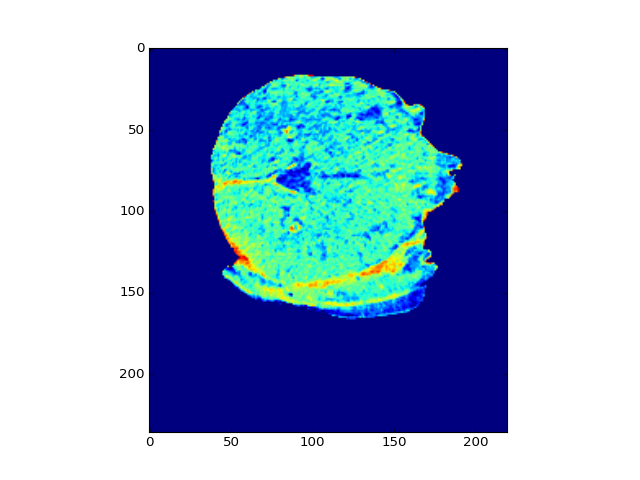

<IPython.core.display.Javascript object>


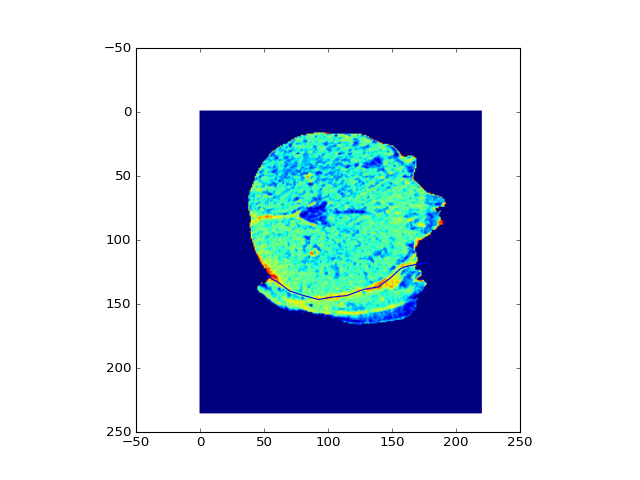

In [43]:
tck, u = interpolate.splprep([x, y], s=0)
spline = interpolate.splev(u, tck)
slice_no = 80
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
ax.plot(spline[0], spline[1])
plt.show()

In [26]:
fig.canvas.mpl_disconnect(cid)

In [13]:
np_coords = np.array(coords)
x = np_coords[:,0]
y = np_coords[:,1]

In [14]:
tck, u = interpolate.splprep([x, y], s=0)
spline = interpolate.splev(u, tck)

<IPython.core.display.Javascript object>


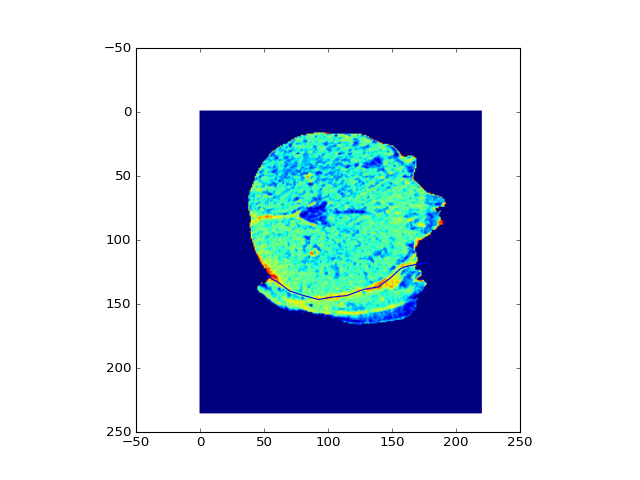

In [15]:
slice_no = 80
plt.ion()
fig.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
ax.plot(spline[0], spline[1])
plt.show()



In [70]:
spline

[array([  56.02164714,   65.85498047,   76.91748047,   92.2820638 ,
         105.1883138 ,  115.02164714,  127.92789714,  137.14664714,
         146.97998047,  150.66748047,  156.19873047,  159.88623047,
         165.41748047,  183.24039714]),
 array([ 131.73144531,  137.26269531,  142.79394531,  145.86686198,
         145.25227865,  142.79394531,  138.49186198,  137.26269531,
         131.11686198,  127.42936198,  121.28352865,  120.66894531,
         120.05436198,  119.43977865])]

In [157]:
for i in range(len(coords)):
    data[i] = 0

<IPython.core.display.Javascript object>


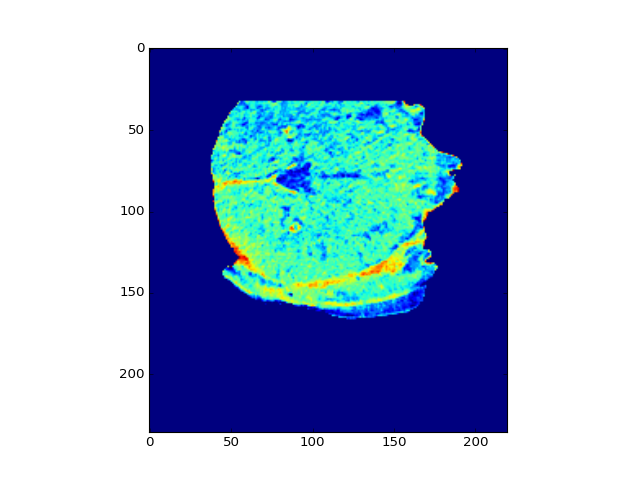

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
plt.ion()

In [126]:
data = BET.extract(np.multiply(bfh(spacerx5).astype(int), thresholded), samp)

In [127]:
# brain = np.multiply(bfh(bd(data)).astype(int), array)

<IPython.core.display.Javascript object>


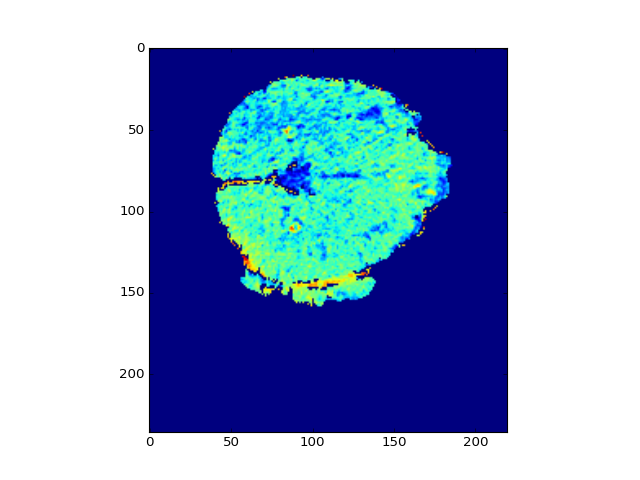

In [128]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,80])
plt.ion()

In [256]:
def pad(mask):
    mask = mask.astype(int)
    from skimage.segmentation import find_boundaries as boundaries
    bounds = boundaries(mask, connectivity=0, mode='outer', background=1)
    return ((bounds.astype(int)+mask)>0).astype(int)

In [412]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4446187/figure/F1/
# reference FSL BET
thresholded = BET.threshold(array,low=0, high=60)
# erodedx3 = be(be(be(thresholded)))
# paddedx3 = pad(pad(pad(erodedx3)))

In [331]:
grad = abs(np.gradient(array)[0])
bounds = boundaries(thresholded>0, connectivity=0, mode='outer', background=0)

In [335]:
mask = (np.multiply(grad>10, grad<25)).astype(int)
grad = np.multiply(mask, grad)

In [359]:
combine = (mask+bounds)>0
bounds = boundaries(combine, connectivity=0, mode='outer', background=0)

<IPython.core.display.Javascript object>


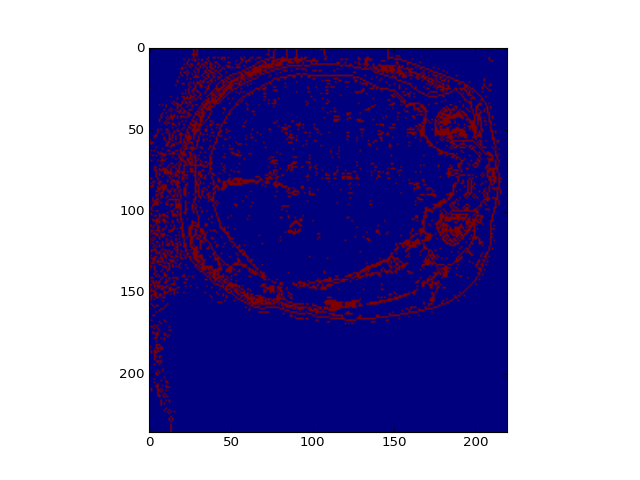

In [361]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(combine[:,:,80])
plt.ion()

In [362]:
primed = np.multiply((combine==False).astype(int), thresholded)

In [353]:
# spaced=BET.spacer(BET.spacer(BET.spacer(thresholded)))

In [363]:
# data = BET.extract(np.multiply(erodedx3.astype(int), array), samp)
data = bfh(BET.extract(primed, samp))

<IPython.core.display.Javascript object>


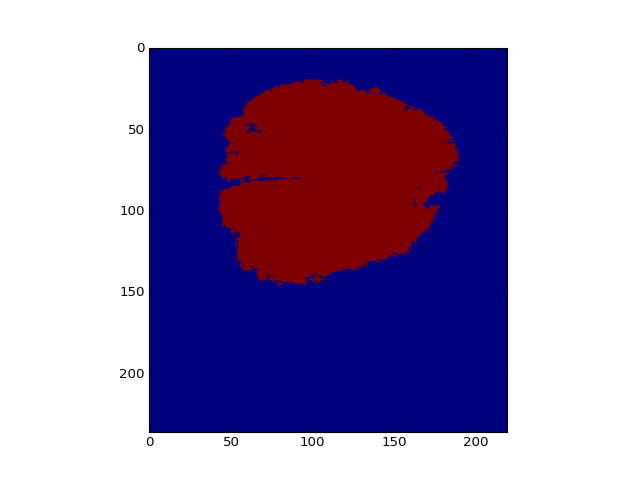

In [396]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4446187/figure/F1/
# reference FSL BET
plt.ion()
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(bfh(data)[:,:,110])
plt.ion()

In [413]:
mask = data>0
mask = mask.astype(float)

In [414]:
macwe = morphsnakes.MorphACWE(mask, smoothing=2, lambda1=1, lambda2=2)
macwe.levelset = mask
macwe.balloon = 1
t0 = time.time()
macwe.run(1)
t1 = time.time()
print t1-t0

outline = macwe.levelset

17.0421030521


In [415]:
# macwe.step()
# outline = macwe.levelset
result = np.multiply(outline, array)
logical = np.multiply(result<100, result>0)
result = np.multiply(logical.astype(int), array)

In [374]:
# paddedx3 = pad(pad(pad(result)))
# brain0 = np.multiply(paddedx3,array)
# logical = np.multiply(brain0<100, brain0>0)
# brain = np.multiply(logical.astype(int), array)

<IPython.core.display.Javascript object>


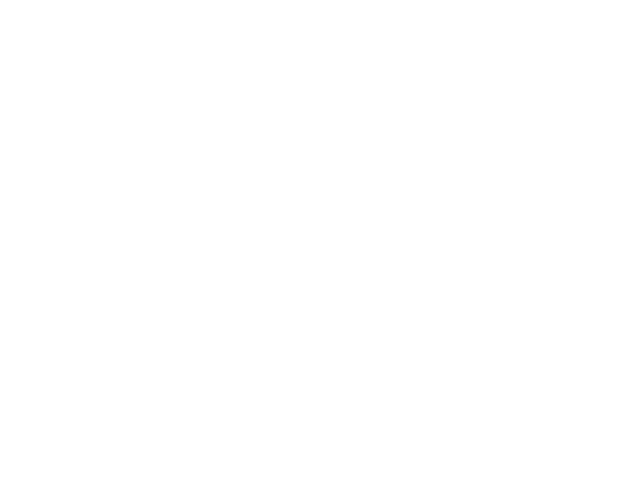

In [417]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4446187/figure/F1/
# reference FSL BET
plt.ion()
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
thresholded = np.multiply(thresholded, np.multiply(thresholded>0, thresholded<100).astype(int))
ax.imshow(result[:,:,110])
plt.ion()

In [149]:
def spacer(data):
    grad = abs(np.gradient(data)[0])
    mask1 = grad<8
    mask2 = grad>0
    mask3 = np.multiply(mask1,mask2) 
    mask4 = (mask3.astype(int)+bounds.astype(int))>0
    result = np.multiply(data, mask4)
    return result

In [131]:
from skimage.segmentation import find_boundaries as boundaries
bounds = boundaries(mask, connectivity=1, mode='inner', background=0)
bounds = bounds==False
bounds = pad(bounds)

<IPython.core.display.Javascript object>


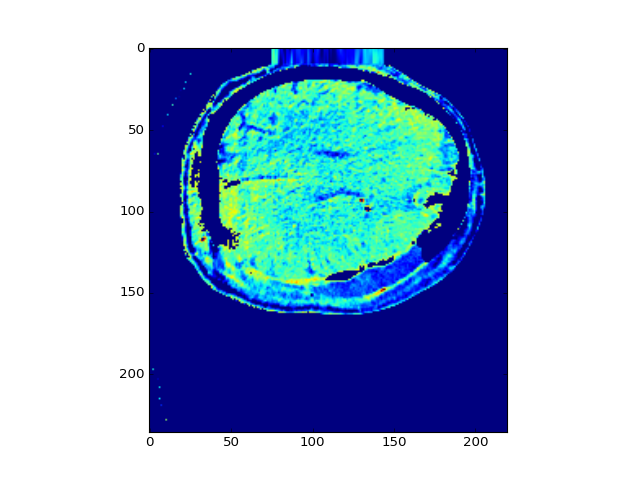

In [419]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(thresholded[:,:,110])
plt.ion()

In [ ]:
# do gradient thing. If the pixel is on an edge, don't delete. use find boundaries?

In [ ]:
# up to here
## see if morphsnakes can be used directly on data

In [12]:
mask = data>0
mask = mask.astype(float)

In [66]:
macwe = morphsnakes.MorphACWE(mask, smoothing=1, lambda1=1, lambda2=1)
macwe.levelset = mask
t0 = time.time()
macwe.step()
t1 = time.time()
print t1-t0

outline = macwe.levelset

11.8952350616


In [67]:
macwe.step()

<IPython.core.display.Javascript object>


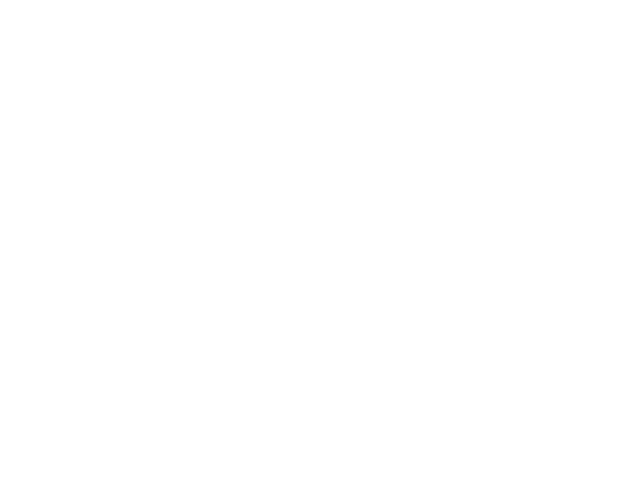

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(outline[:,:,80])
plt.ion()

In [64]:
# g(I)
gI = morphsnakes.gborders(data, alpha=1000, sigma=20)

# Morphological GAC. Initialization of the level-set.
mgac = morphsnakes.MorphGAC(gI, smoothing=1, threshold=0.5, balloon=1)
mgac.levelset = mask
mgac.step()
outline = mgac.levelset

In [ ]:
macwe = morphsnakes.MorphACWE(mask, smoothing=40, lambda1=1, lambda2=2)
macwe.levelset = mask.astype(float)
t0 = time.time()
macwe.step()
t1 = time.time()
print t1-t0

outline = macwe.levelset

In [11]:
spaced = BET.spacer(data)
spaced2 = BET.spacer(spaced)

In [12]:
spaced3 = BET.spacer(spaced2)

<IPython.core.display.Javascript object>


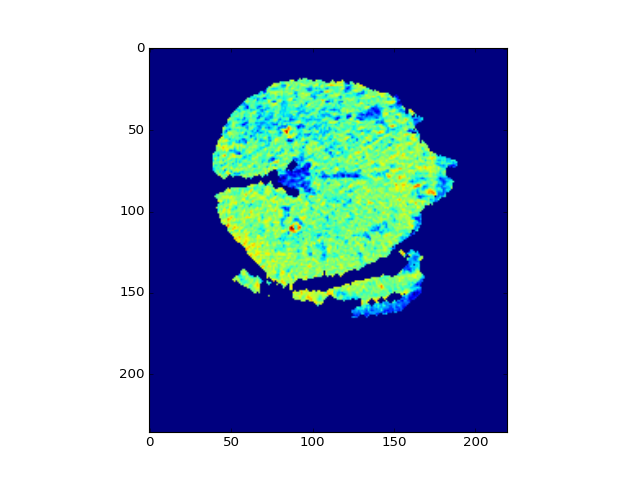

In [187]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(spaced2[:,:,80])
plt.ion()

In [15]:
data2 = BET.extract(spaced2, samp)
data3 = BET.extract(spaced3, samp)

<IPython.core.display.Javascript object>


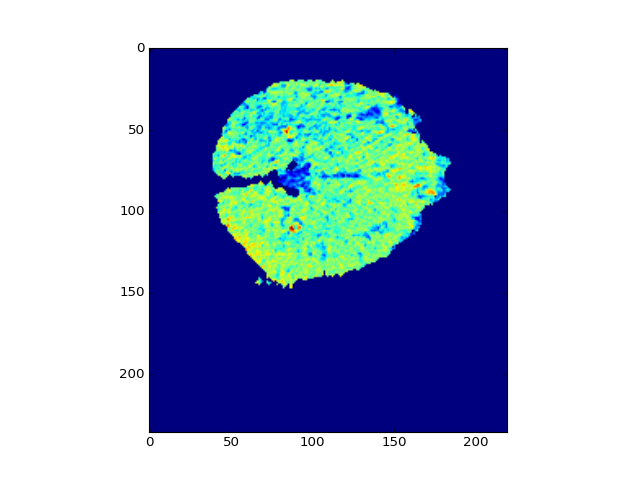

In [188]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data2[:,:,80])
plt.ion()

<IPython.core.display.Javascript object>


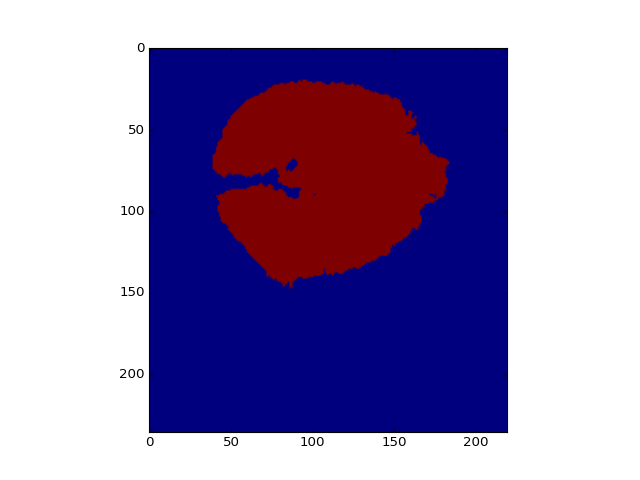

In [189]:
mask = data3>0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mask[:,:,80])
plt.ion()

In [173]:
from skimage.segmentation import find_boundaries as boundaries
bounds = boundaries(mask, connectivity=1, mode='outer', background=0)
mask = mask.astype(int)+bounds.astype(int)

In [174]:
import time

In [175]:
import morphsnakes.morphsnakes as morphsnakes

In [78]:
macwe = morphsnakes.MorphACWE(mask, smoothing=40, lambda1=1, lambda2=2)
macwe.levelset = mask.astype(float)
t0 = time.time()
macwe.step()
t1 = time.time()
print t1-t0

outline = macwe.levelset

179.103720903


In [216]:
print outline.shape
def pad(mask):
    mask = mask.astype(int)
    from skimage.segmentation import find_boundaries as boundaries
    bounds = boundaries(mask, connectivity=1, mode='outer', background=0)
    mask = mask+bounds.astype(int)
    return mask

(236, 220, 183)


In [217]:
for i in range(5):
    outline = pad(outline)
outline = outline>0
outline = outline.astype(int)

In [218]:
brain = np.multiply(outline, array)

In [219]:
thr = BET.threshold(brain, low=-200, high=1100)

<IPython.core.display.Javascript object>


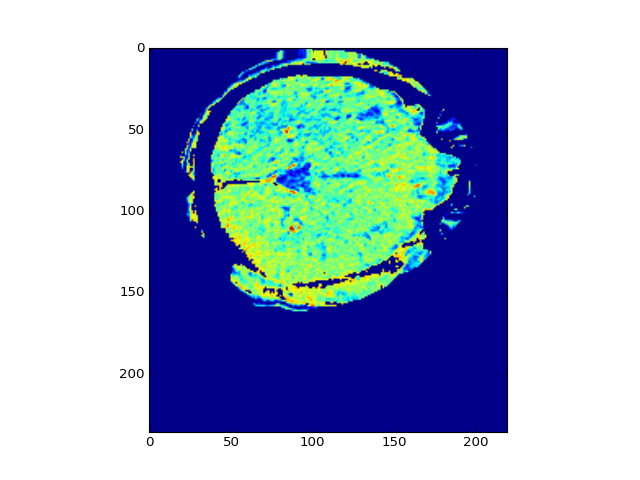

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(thr[:,:,80]) # with 50
plt.ion()